In [1]:
%matplotlib inline


import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate

<font size="5"> # Pre-processing</font>



In [2]:
df = pd.read_csv("/home/capella/Downloads/diamonds.csv")

In [3]:
df= df.drop(['Unnamed: 0'], axis=1)

In [4]:
df["price"] = df["price"].astype(float)

In [5]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142.0,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167.0,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696.0,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837.0,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731.0,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954.0,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139.0,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564.0,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381.0,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631.0,8.49,8.45,0.0


In [6]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [7]:
df.shape

(53920, 10)

In [8]:


df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)

In [9]:
df

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


<Figure size 1440x864 with 0 Axes>

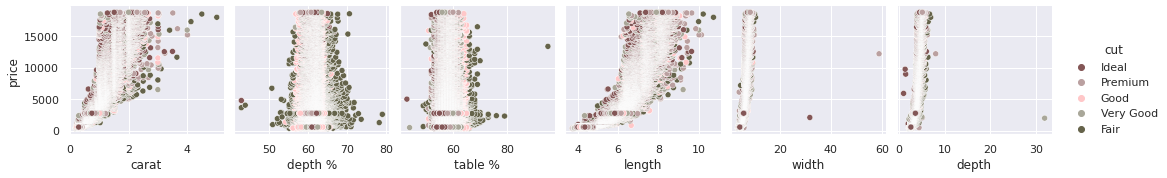

In [11]:
plt.figure(figsize=(20,12))
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df,x_vars = ['carat','depth %','table %', 'length', 'width', 'depth'] , y_vars =  ['price'],hue= "cut",palette=shade)

Text(0.5, 1.0, "Regression Line on Price vs 'width'")

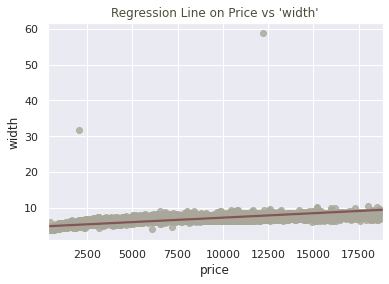

In [12]:
ax = sns.regplot(x="price", y="width", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'width'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'depth'")

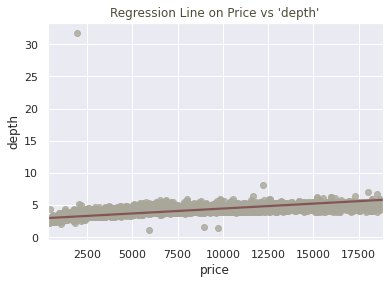

In [13]:
ax= sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'depth'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'length'")

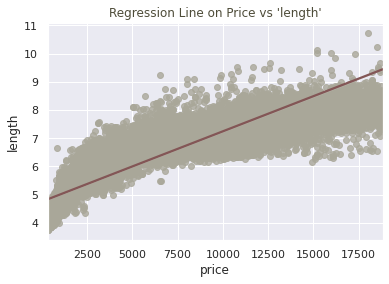

In [14]:
ax= sns.regplot(x="price", y="length", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'length'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth %')

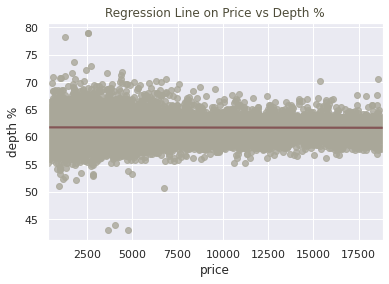

In [15]:
ax= sns.regplot(x="price", y="depth %", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Depth %", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table %')

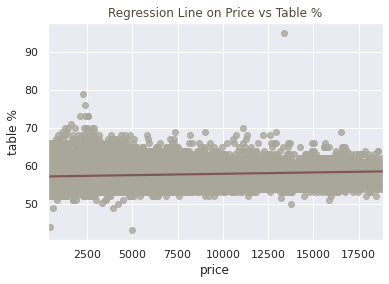

In [16]:
ax=sns.regplot(x="price", y="table %", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color":"#835656" })
ax.set_title("Regression Line on Price vs Table %", color="#4e4c39")

In [17]:
df = df[(df["depth %"]<75)&(df["depth %"]>45)]
df = df[(df["table %"]<80)&(df["table %"]>40)]
df = df[(df["length"]<30)]
df = df[(df["width"]<30)]
df = df[(df["depth"]<30)&(df["depth"]>2)]
df.shape

(53907, 10)

<AxesSubplot:xlabel='depth', ylabel='Count'>

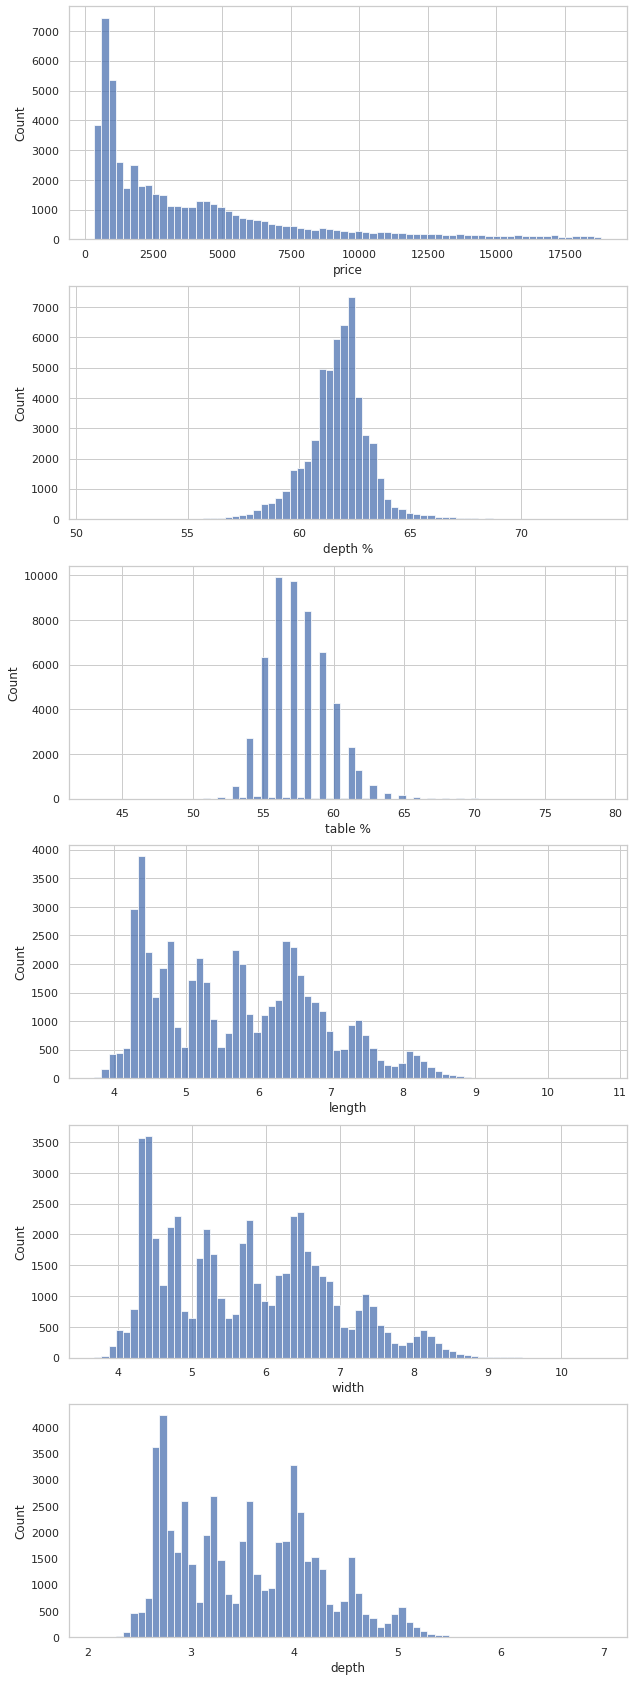

In [18]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 30))            #22


plt.subplot(611)
sns.histplot(data=df, x="price", bins = 70)


plt.subplot(612)
sns.histplot(data=df, x="depth %", bins = 70)

plt.subplot(613)
sns.histplot(data=df, x="table %", bins = 70)

plt.subplot(614)
sns.histplot(data=df, x="length", bins = 70)

plt.subplot(615)
sns.histplot(data=df, x="width", bins = 70)


plt.subplot(616).grid()
sns.histplot(data=df, x="depth", bins = 70)


The box plot after removal of outliers:

<AxesSubplot:xlabel='cut', ylabel='price'>

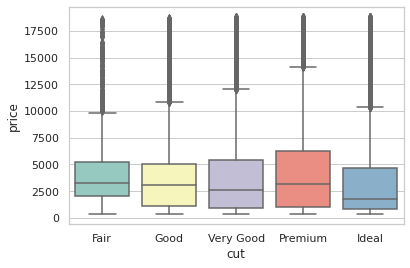

In [19]:
sns.boxplot(x="cut", y="price",data=df, palette="Set3", order=["Fair", "Good", "Very Good", "Premium", "Ideal"])


<AxesSubplot:xlabel='color', ylabel='price'>

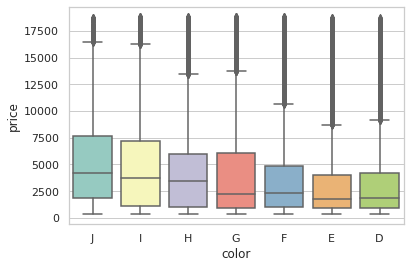

In [20]:
sns.boxplot(x="color", y="price",data=df, palette="Set3", order=["J", "I", "H","G", "F", "E", "D"]) #J to D -worst to best


<AxesSubplot:xlabel='clarity', ylabel='price'>

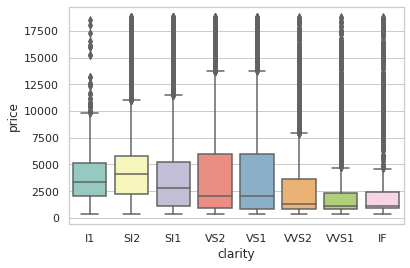

In [21]:
sns.boxplot(x="clarity", y="price",data=df, palette="Set3", order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])


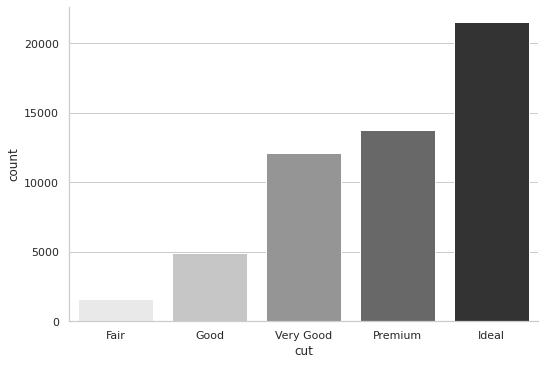

In [22]:
sns.catplot(x= "cut",data= df,kind="count", height=5, aspect=1.5, order = ["Fair", "Good", "Very Good", "Premium", "Ideal"], palette="Greys")

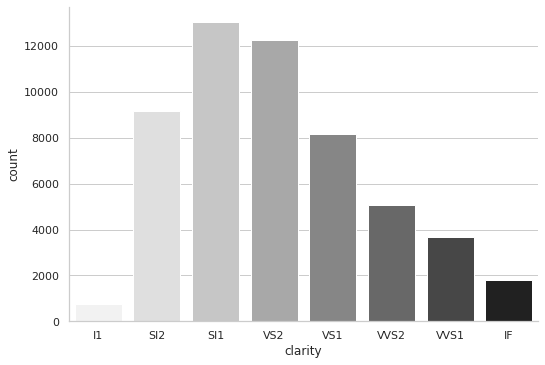

In [23]:
sns.catplot(x= "clarity",data= df,kind="count", height=5, aspect=1.5, order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette = "Greys")

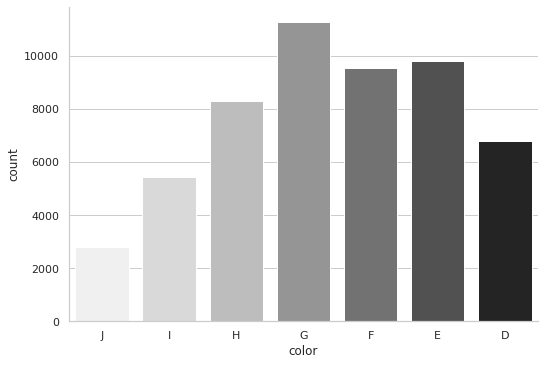

In [24]:
sns.catplot(x= "color",data= df,kind="count", height=5, aspect=1.5, order=["J", "I", "H","G", "F", "E", "D"], palette="Greys")

In [25]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [26]:
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75


In [27]:
x= label_data.drop(["price"],axis =1)
y= label_data["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=66)

<font size="5"># Ordinary Least Squares</font>



In [28]:
from sklearn.pipeline import Pipeline

In [29]:
clf_ols=Pipeline([("scalar1",StandardScaler()),
                     ("ols_classifier",LinearRegression())])


In [30]:
clf_ols.fit(x_train, y_train)

Pipeline(steps=[('scalar1', StandardScaler()),
                ('ols_classifier', LinearRegression())])

In [31]:
tr_score_ols = clf_ols.score(x_train, y_train)
te_score_ols = clf_ols.score(x_test, y_test)

In [32]:
tr_score_ols


0.8850752490609832

In [33]:
te_score_ols

0.8925015882476999

In [34]:
y_pred_ols = clf_ols.predict(x_test)

mse_ols = mean_squared_error(y_test, y_pred_ols)
mae_ols = mean_absolute_error(y_test, y_pred_ols)
rmse_ols = mean_squared_error(y_test, y_pred_ols)**0.5
r2_ols = r2_score(y_test, y_pred_ols)

In [35]:
print('Linear Regression Metrics:OLS')
print(mse_ols)
print(mae_ols)
print(rmse_ols)
print(r2_ols)

Linear Regression Metrics:OLS
1734272.1528827874
843.9728573987237
1316.91767126225
0.8925015882476999


In [36]:
accuracies_ols = cross_val_score(estimator = clf_ols, X = x_train, y = y_train, cv = 5,verbose = 1)
matplotlib.rcParams['axes.unicode_minus'] = Falsematplotlib.rcParams['axes.unicode_minus'] = Falseaccuracies_ols

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


array([0.89241522, 0.87913463, 0.88816697, 0.88886226, 0.87535105])

<AxesSubplot:ylabel='price'>

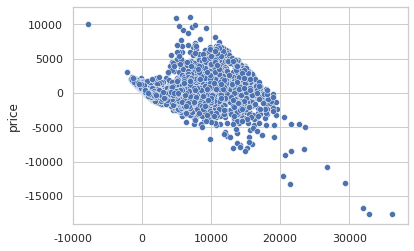

In [39]:
import matplotlib as mlt
mlt.rcParams['axes.unicode_minus'] = False
sns.scatterplot(x=y_pred_ols, y=y_test-y_pred_ols, palette = "deep")


<AxesSubplot:xlabel='price', ylabel='Count'>

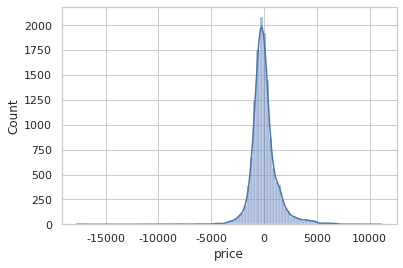

In [40]:
sns.histplot(y_test-y_pred_ols, bins = 100, kde=True)

<font size="5"># Ridge: MSE Cross validated vs log scaled lamda: </font>



In [41]:
clf_ridge_list = []
rr =  []
rmse_ridge_alpha = []
mae_ridge_alpha = []
r2_score_ridge_alpha = []
n_alphas = 50
alpha1 =  np.linspace(0, 200, 4 * n_alphas)
alpha2 = np.linspace(201, 10001, 500)
alpha = np.concatenate((alpha1, alpha2))

alpha = abs(alpha)
mse_ridge_alpha = []
train_score_ridge_alpha = []
test_score_ridge_alpha = []


In [42]:
len(alpha)

700

In [43]:
alpha

array([0.00000000e+00, 1.00502513e+00, 2.01005025e+00, 3.01507538e+00,
       4.02010050e+00, 5.02512563e+00, 6.03015075e+00, 7.03517588e+00,
       8.04020101e+00, 9.04522613e+00, 1.00502513e+01, 1.10552764e+01,
       1.20603015e+01, 1.30653266e+01, 1.40703518e+01, 1.50753769e+01,
       1.60804020e+01, 1.70854271e+01, 1.80904523e+01, 1.90954774e+01,
       2.01005025e+01, 2.11055276e+01, 2.21105528e+01, 2.31155779e+01,
       2.41206030e+01, 2.51256281e+01, 2.61306533e+01, 2.71356784e+01,
       2.81407035e+01, 2.91457286e+01, 3.01507538e+01, 3.11557789e+01,
       3.21608040e+01, 3.31658291e+01, 3.41708543e+01, 3.51758794e+01,
       3.61809045e+01, 3.71859296e+01, 3.81909548e+01, 3.91959799e+01,
       4.02010050e+01, 4.12060302e+01, 4.22110553e+01, 4.32160804e+01,
       4.42211055e+01, 4.52261307e+01, 4.62311558e+01, 4.72361809e+01,
       4.82412060e+01, 4.92462312e+01, 5.02512563e+01, 5.12562814e+01,
       5.22613065e+01, 5.32663317e+01, 5.42713568e+01, 5.52763819e+01,
      

In [45]:
for i in range(0,len(alpha)):
    r = Ridge(alpha = alpha[i])
    rr.append(r)

In [46]:
rr

[Ridge(alpha=0.0),
 Ridge(alpha=1.0050251256281406),
 Ridge(alpha=2.0100502512562812),
 Ridge(alpha=3.015075376884422),
 Ridge(alpha=4.0201005025125625),
 Ridge(alpha=5.025125628140703),
 Ridge(alpha=6.030150753768844),
 Ridge(alpha=7.035175879396984),
 Ridge(alpha=8.040201005025125),
 Ridge(alpha=9.045226130653266),
 Ridge(alpha=10.050251256281406),
 Ridge(alpha=11.055276381909547),
 Ridge(alpha=12.060301507537687),
 Ridge(alpha=13.065326633165828),
 Ridge(alpha=14.070351758793969),
 Ridge(alpha=15.07537688442211),
 Ridge(alpha=16.08040201005025),
 Ridge(alpha=17.08542713567839),
 Ridge(alpha=18.09045226130653),
 Ridge(alpha=19.09547738693467),
 Ridge(alpha=20.100502512562812),
 Ridge(alpha=21.105527638190953),
 Ridge(alpha=22.110552763819094),
 Ridge(alpha=23.115577889447234),
 Ridge(alpha=24.120603015075375),
 Ridge(alpha=25.125628140703515),
 Ridge(alpha=26.130653266331656),
 Ridge(alpha=27.135678391959797),
 Ridge(alpha=28.140703517587937),
 Ridge(alpha=29.145728643216078),
 Ridge

In [47]:
for i in range(0,len(alpha)):
    
    clf_ridge = Pipeline(steps=[('scaler2', StandardScaler()),
                      ('ridge_classifier', rr[i])])
    clf_ridge_list.append(clf_ridge)

In [48]:
scores = []
stds = []


In [49]:
for i in range(0, len(alpha)):
    score = cross_validate(clf_ridge_list[i], x_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error' ),
                            return_train_score=True)
    c = score['test_neg_mean_squared_error']
    c = abs(c)
    m = c.mean()
    st = np.std(c)
    scores.append(m)
    stds.append(st)
    

In [52]:
stds

[92992.91683846447,
 93186.48678930786,
 93355.94433584374,
 93504.0660629081,
 93633.29427619642,
 93745.76627414789,
 93843.34828400804,
 93927.66916461302,
 94000.15164480108,
 94062.04024426371,
 94114.42571928487,
 94158.26620907143,
 94194.40540066398,
 94223.58807347284,
 94246.47337842555,
 94263.6461778467,
 94275.62673496829,
 94282.87900346349,
 94285.81773114287,
 94284.81455945349,
 94280.20327217586,
 94272.28432237143,
 94261.32874617602,
 94247.58155466364,
 94231.2646805594,
 94212.57954443581,
 94191.70929491939,
 94168.82076891907,
 94144.0662109196,
 94117.58478434343,
 94089.50390313161,
 94059.940407476,
 94029.00160413403,
 93996.78618886243,
 93963.3850659484,
 93928.88207776226,
 93893.35465544344,
 93856.87440032288,
 93819.50760440729,
 93781.31571710322,
 93742.3557644751,
 93702.68072647708,
 93662.33987692001,
 93621.37909033173,
 93579.8411193776,
 93537.76584600408,
 93495.19050916802,
 93452.14991158109,
 93408.67660768125,
 93364.8010747784,
 93320.551

In [53]:
import math
stds[3]

93504.0660629081

In [54]:
for i in range(0,len(alpha)):
    stds[i] = float(stds[i]/(math.sqrt(5)))
    

In [55]:
stds

[41587.696695358274,
 41674.2638090557,
 41750.04752772661,
 41816.289577858726,
 41874.08219176343,
 41924.38119836037,
 41968.02119984604,
 42005.73064403712,
 42038.14579461278,
 42065.82321769892,
 42089.2507143351,
 42108.85677740103,
 42125.01871521159,
 42138.069603244745,
 42148.30422275676,
 42155.98413213069,
 42161.34200015713,
 42164.585313226395,
 42165.89955219809,
 42165.450920179974,
 42163.38868981666,
 42159.84722780204,
 42154.947745180914,
 42148.79981423664,
 42141.50268630116,
 42133.14643939293,
 42123.812980067705,
 42113.57692005941,
 42102.50634517145,
 42090.663491178355,
 42078.105339326816,
 42064.88414213912,
 42051.04788865609,
 42036.640716961956,
 42021.703280689835,
 42006.273075287616,
 41990.384729013575,
 41974.07026295635,
 41957.35932380263,
 41940.27939256244,
 41922.85597206712,
 41905.112755672424,
 41887.071779296486,
 41868.75355865183,
 41850.17721331166,
 41831.36057902465,
 41812.32030955857,
 41793.07196915925,
 41773.630116613946,
 41754

In [56]:
min(scores)
for i in range(0, len(alpha)):
    if scores[i] == min(scores):
        print('%d', i)
        break

#scores[1]
#cores[0]


%d 2


In [57]:
g = pd.DataFrame({'mse_cross':scores, 'stds_cross': stds})

In [58]:
g


,mse_cross,stds_cross
0,1.821326e+06,41587.696695
1,1.821225e+06,41674.263809
2,1.821202e+06,41750.047528
3,1.821242e+06,41816.289578
4,1.821333e+06,41874.082192
...,...,...
695,2.607134e+06,33517.385565
696,2.607787e+06,33523.044019
697,2.608440e+06,33528.709778
698,2.609092e+06,33534.382820


In [59]:
error = stds

In [60]:
scores

[1821326.1419876355,
 1821224.9466835079,
 1821202.2651046882,
 1821242.318385177,
 1821332.7533865198,
 1821463.807972402,
 1821627.7024266678,
 1821818.1899117015,
 1822030.2203899133,
 1822259.686568904,
 1822503.2298714246,
 1822758.090832118,
 1823021.9927248578,
 1823293.0502916623,
 1823569.6976077296,
 1823850.630660799,
 1824134.7613365278,
 1824421.1803125613,
 1824709.1269606207,
 1824997.9647985175,
 1825287.161365362,
 1825576.2716430663,
 1825864.9243372243,
 1826152.810475837,
 1826439.673896439,
 1826725.3032791298,
 1827009.5254508734,
 1827292.1997397467,
 1827573.2131998478,
 1827852.47656101,
 1828129.9207841426,
 1828405.4941243138,
 1828679.159620978,
 1828950.8929486428,
 1829220.6805725899,
 1829488.5181635194,
 1829754.4092325289,
 1830018.3639540835,
 1830280.3981497544,
 1830540.5324097462,
 1830798.7913328074,
 1831055.2028680097,
 1831309.7977443852,
 1831562.608976464,
 1831813.6714354802,
 1832063.02147751,
 1832310.6966210087,
 1832556.735267286,
 183280

In [61]:
h = []
j = []
for i in range(0, len(alpha)):
    if scores[i] >= min(scores)- float(stds[2]/2) and scores[i] <= min(scores)+ float(stds[2]/2):
        h.append(scores[i])
        j.append(i)
        print(i)
    
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [62]:
len(j)

90

In [63]:
alpha[max(j)]

89.44723618090451

In [64]:
len(scores)

700

In [65]:
len(alpha)

700

In [66]:
alpha[2]

2.0100502512562812

In [67]:
k = []
for i in range(0, len(alpha)):
    e = alpha[2]
    k.append(e)

In [68]:
len(k)

700

In [69]:
an = []
for i in range(0, len(alpha)):
    e = alpha[89]
    an.append(e)

In [70]:
an

[89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,
 89.44723618090451,


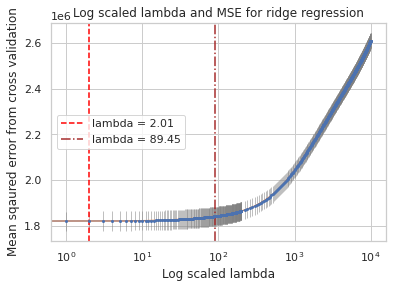

In [71]:
ax = plt.gca()
plt.xscale("log")
ax.errorbar(x = alpha, y = scores, yerr=error, ecolor = 'grey', marker='o', markersize = 2, linewidth = 0.5)

ax.plot(alpha, scores)
plt.axvline(x = alpha[2],ls = '--', label = 'lambda = 2.01', color = 'red')
plt.axvline(x = alpha[89],ls = '-.', label = 'lambda = 89.45', color = 'brown')
plt.legend(loc='center left')
#ax.plot(k,scores, ls = '--', color = 'red')
#ax.plot(an,scores, ls ='--', color = 'brown')
  # reverse axi
#plt.annotate('Lamda = 89.45', xy = (10^2, 2.2),fontsize = 16, xytext = (4*10^2, 2.2), arrowprops = dict(facecolor = 'red'),color = 'g')
plt.xlabel("Log scaled lambda")


plt.ylabel("Mean sqaured error from cross validation")
plt.title("Log scaled lambda and MSE for ridge regression")    #-530 to  400 was the deal.
#plt.axis("tight")
plt.show()

n_alphas = 50
alpha1 =  np.linspace(0, 200, 4 * n_alphas)
alpha2 = np.linspace(201, 10000000, 1000)
alpha = np.concatenate((alpha1, alpha2))
len(alpha) = 1200

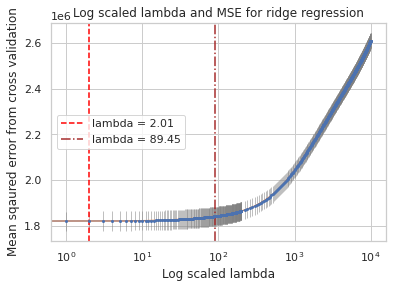

In [72]:
ax = plt.gca()
plt.xscale("log")
ax.errorbar(x = alpha, y = scores, yerr=error, ecolor = 'grey', marker='o', markersize = 2, linewidth = 0.5)

ax.plot(alpha, scores)
plt.axvline(x = alpha[2],ls = '--', label = 'lambda = 2.01', color = 'red')
plt.axvline(x = alpha[89],ls = '-.', label = 'lambda = 89.45', color = 'brown')
plt.legend(loc='center left')
#ax.plot(k,scores, ls = '--', color = 'red')
#ax.plot(an,scores, ls ='--', color = 'brown')
  # reverse axi
#plt.annotate('Lamda = 89.45', xy = (10^2, 2.2),fontsize = 16, xytext = (4*10^2, 2.2), arrowprops = dict(facecolor = 'red'),color = 'g')
plt.xlabel("Log scaled lambda")


plt.ylabel("Mean sqaured error from cross validation")
plt.title("Log scaled lambda and MSE for ridge regression")    #-530 to  400 was the deal.
#plt.axis("tight")
plt.show()

<font size="5"> # For ridge (data), Weights vs Reg.Coef </font>

In [73]:
clf_ridge_list = []
rr =  []
rmse_ridge_alpha = []
mae_ridge_alpha = []
r2_score_ridge_alpha = []
n_alphas = 1001
alpha = np.linspace(0, 1000000, n_alphas)

mse_ridge_alpha = []
train_score_ridge_alpha = []
test_score_ridge_alpha = []


In [74]:
for i in range(0,len(alpha)):
    r = Ridge(alpha = alpha[i])
    rr.append(r)

In [76]:
rr

[Ridge(alpha=0.0),
 Ridge(alpha=1000.0),
 Ridge(alpha=2000.0),
 Ridge(alpha=3000.0),
 Ridge(alpha=4000.0),
 Ridge(alpha=5000.0),
 Ridge(alpha=6000.0),
 Ridge(alpha=7000.0),
 Ridge(alpha=8000.0),
 Ridge(alpha=9000.0),
 Ridge(alpha=10000.0),
 Ridge(alpha=11000.0),
 Ridge(alpha=12000.0),
 Ridge(alpha=13000.0),
 Ridge(alpha=14000.0),
 Ridge(alpha=15000.0),
 Ridge(alpha=16000.0),
 Ridge(alpha=17000.0),
 Ridge(alpha=18000.0),
 Ridge(alpha=19000.0),
 Ridge(alpha=20000.0),
 Ridge(alpha=21000.0),
 Ridge(alpha=22000.0),
 Ridge(alpha=23000.0),
 Ridge(alpha=24000.0),
 Ridge(alpha=25000.0),
 Ridge(alpha=26000.0),
 Ridge(alpha=27000.0),
 Ridge(alpha=28000.0),
 Ridge(alpha=29000.0),
 Ridge(alpha=30000.0),
 Ridge(alpha=31000.0),
 Ridge(alpha=32000.0),
 Ridge(alpha=33000.0),
 Ridge(alpha=34000.0),
 Ridge(alpha=35000.0),
 Ridge(alpha=36000.0),
 Ridge(alpha=37000.0),
 Ridge(alpha=38000.0),
 Ridge(alpha=39000.0),
 Ridge(alpha=40000.0),
 Ridge(alpha=41000.0),
 Ridge(alpha=42000.0),
 Ridge(alpha=43000.0),
 

In [77]:
for i in range(0,len(alpha)):
    
    clf_ridge = Pipeline(steps=[('scaler2', StandardScaler()),
                      ('ridge_classifier', rr[i])])
    clf_ridge_list.append(clf_ridge)

In [78]:
clf_ridge_list

[Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=0.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=1000.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=2000.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=3000.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=4000.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=5000.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=6000.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=7000.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=8000.0))]),
 Pipeline(ste

In [79]:
y_pred_ridge_alpha = []
coef_ridge_alpha = []

In [80]:
for i in range(0,len(alpha)):
    
    
    clf_ridge_list[i].fit(x_train, y_train)
    tr_score = clf_ridge_list[i].score(x_train, y_train)
    train_score_ridge_alpha.append(tr_score)
    te_score = clf_ridge_list[i].score(x_test, y_test)
    test_score_ridge_alpha.append(te_score) 
    y_pred_ri = clf_ridge_list[i].predict(x_test)
    y_pred_ridge_alpha.append(y_pred_ri)
    mse_ri = mean_squared_error(y_test, y_pred_ri)
    mse_ridge_alpha.append(mse_ri)
    mae_ri = mean_absolute_error(y_test, y_pred_ri)
    mae_ridge_alpha.append(mae_ri)
    rmse_ri = mean_squared_error(y_test, y_pred_ri)**0.5
    rmse_ridge_alpha.append(rmse_ri)
    r2_ri = r2_score(y_test, y_pred_ri)
    r2_score_ridge_alpha.append(r2_ri)
    coef_ridge = rr[i].coef_
    coef_ridge_alpha.append(coef_ridge)

In [81]:
mse_ridge_alpha

[1734272.1528827786,
 1912014.2588470927,
 2059892.40662942,
 2159604.8605799824,
 2231418.5760590723,
 2286971.782673216,
 2332577.2328561237,
 2371829.4517305735,
 2406886.3199319085,
 2439103.329931308,
 2469364.19922894,
 2498262.74617602,
 2526207.89358552,
 2553486.880368293,
 2580304.70757922,
 2606809.527618944,
 2633109.42887085,
 2659283.7928696685,
 2685391.1366742677,
 2711474.6256185304,
 2737566.00989312,
 2763688.4750302727,
 2789858.7316464735,
 2816088.5644572885,
 2842385.991836915,
 2868756.14150797,
 2895201.917072554,
 2921724.5089118187,
 2948323.7882429273,
 2974998.6127366517,
 3001747.064693988,
 3028566.637443166,
 3055454.381733105,
 3082407.021044688,
 3109421.0426255,
 3136492.7694732905,
 3163618.417303941,
 3190794.1396383224,
 3218016.063454882,
 3245280.317327258,
 3272583.053559024,
 3299920.4655118226,
 3327288.801076918,
 3354684.37304725,
 3382103.5669953506,
 3409542.8471425953,
 3436998.760610218,
 3464467.940366816,
 3491947.1071267147,
 3519433.

In [82]:
rmse_ridge_alpha

[1316.9176712622466,
 1382.7560373569493,
 1435.2325270246004,
 1469.5594103608,
 1493.7933511898734,
 1512.2737128817705,
 1527.2777196227685,
 1540.074495513309,
 1551.4142966763934,
 1561.762891712858,
 1571.4210763601652,
 1580.5893667161056,
 1589.404886611816,
 1597.9633538877833,
 1606.3326889468508,
 1614.5617137845627,
 1622.6858688208417,
 1630.7310608649325,
 1638.7163075634135,
 1646.655588038534,
 1654.5591587770803,
 1662.4345024783,
 1670.2870207381943,
 1678.120545270002,
 1685.9377188487465,
 1693.740281598088,
 1701.52928775045,
 1709.3052708371956,
 1717.0683702878366,
 1724.818428918433,
 1732.5550683005686,
 1740.2777472125438,
 1747.985807074275,
 1755.6785073141061,
 1763.355052910644,
 1771.0146158271225,
 1778.656351660978,
 1786.2794125327432,
 1793.8829570110981,
 1801.4661576969072,
 1809.0282069550558,
 1816.5683211792016,
 1824.0857438938879,
 1831.57974793544,
 1839.0496369036239,
 1846.4947460370947,
 1853.9144426348855,
 1861.308126121738,
 1868.6752278

In [83]:
mae_ridge_alpha

[843.9728573987315,
 953.9037300363847,
 1015.6099904875299,
 1050.0658563915583,
 1071.2980808005552,
 1085.1872176011466,
 1094.7341333166264,
 1101.5146140978404,
 1106.5687599882779,
 1110.368310175803,
 1113.2863974454287,
 1115.61922795642,
 1117.5497131126422,
 1119.2029641832314,
 1120.6615987297423,
 1121.9605255692231,
 1123.1497244428056,
 1124.3237241474512,
 1125.5272518994643,
 1126.7329449959848,
 1127.9521851650481,
 1129.2176199983303,
 1130.51839816568,
 1131.8932217696074,
 1133.3156680617533,
 1134.8307181783678,
 1136.4216950540394,
 1138.114874269742,
 1139.8820474586742,
 1141.7007722944186,
 1143.5935105966887,
 1145.5841114813277,
 1147.6823077880204,
 1149.9095173657913,
 1152.259458409865,
 1154.717109466123,
 1157.2779457798422,
 1159.9572662726794,
 1162.7638941228797,
 1165.705270843144,
 1168.7914017893536,
 1172.0210172660463,
 1175.397348776009,
 1178.9212898225041,
 1182.584918077856,
 1186.3679350768305,
 1190.2893819312262,
 1194.3281847569308,
 1198

In [84]:
r2_score_ridge_alpha

[0.8925015882477004,
 0.8814842896876606,
 0.8723181008671528,
 0.86613745014645,
 0.8616860955287786,
 0.8582426443559964,
 0.8554158022979248,
 0.8529827636426348,
 0.8508097727159287,
 0.8488128096668556,
 0.8469370974942695,
 0.8451458285209446,
 0.8434136557718684,
 0.841722774817293,
 0.8400604787197455,
 0.8384175842909127,
 0.8367873917002501,
 0.8351649805038167,
 0.833546723536823,
 0.83192994520719,
 0.8303126774875447,
 0.8286934832286557,
 0.8270713266272738,
 0.8254454772108462,
 0.8238154379625182,
 0.8221808910417268,
 0.8205416564694452,
 0.8188976604602052,
 0.8172489109965775,
 0.8155954788855445,
 0.813937482995184,
 0.8122750787008985,
 0.8106084488112553,
 0.8089377964204459,
 0.8072633392655222,
 0.8055853052645194,
 0.8039039289853119,
 0.8022194488509158,
 0.8005321049295722,
 0.7988421371906449,
 0.7971497841326037,
 0.7954552817089446,
 0.7937588624931593,
 0.7920607550358256,
 0.7903611833762971,
 0.7886603666788992,
 0.786958518969431,
 0.785255848952465,
 

In [85]:
test_score_ridge_alpha 

[0.8925015882477004,
 0.8814842896876606,
 0.8723181008671528,
 0.86613745014645,
 0.8616860955287786,
 0.8582426443559964,
 0.8554158022979248,
 0.8529827636426348,
 0.8508097727159287,
 0.8488128096668556,
 0.8469370974942695,
 0.8451458285209446,
 0.8434136557718684,
 0.841722774817293,
 0.8400604787197455,
 0.8384175842909127,
 0.8367873917002501,
 0.8351649805038167,
 0.833546723536823,
 0.83192994520719,
 0.8303126774875447,
 0.8286934832286557,
 0.8270713266272738,
 0.8254454772108462,
 0.8238154379625182,
 0.8221808910417268,
 0.8205416564694452,
 0.8188976604602052,
 0.8172489109965775,
 0.8155954788855445,
 0.813937482995184,
 0.8122750787008985,
 0.8106084488112553,
 0.8089377964204459,
 0.8072633392655222,
 0.8055853052645194,
 0.8039039289853119,
 0.8022194488509158,
 0.8005321049295722,
 0.7988421371906449,
 0.7971497841326037,
 0.7954552817089446,
 0.7937588624931593,
 0.7920607550358256,
 0.7903611833762971,
 0.7886603666788992,
 0.786958518969431,
 0.785255848952465,
 

In [86]:
train_score_ridge_alpha

[0.8850752490609832,
 0.8734971308782208,
 0.8644966213630324,
 0.8584208539970164,
 0.8540373316053981,
 0.8506400440510333,
 0.8478461865854547,
 0.8454378317857019,
 0.8432841768699453,
 0.8413030719683969,
 0.8394409682800413,
 0.8376618882523486,
 0.8359410584093279,
 0.8342610769265533,
 0.8326095225269811,
 0.830977415807377,
 0.8293582022955694,
 0.8277470645469391,
 0.8261404472848904,
 0.8245357237167892,
 0.8229309573419605,
 0.821324729542133,
 0.8197160132338862,
 0.8181040792503192,
 0.8164884262870323,
 0.8148687280171576,
 0.8132447928515459,
 0.8116165331039606,
 0.8099839412140932,
 0.8083470713103025,
 0.8067060248423971,
 0.805060939337878,
 0.8034119795702044,
 0.8017593306003494,
 0.8001031922808721,
 0.7984437749072721,
 0.7967812957732752,
 0.7951159764411444,
 0.7934480405796287,
 0.7917777122539905,
 0.7901052145771232,
 0.7884307686498062,
 0.786754592732984,
 0.7850769016065794,
 0.7833979060784793,
 0.7817178126145459,
 0.7800368230662222,
 0.77835513447684

In [87]:
coef_ridge_alpha

[array([ 5363.1254574 ,    57.25437712,  -463.35746281,   486.90672078,
          218.88211203,  -194.95691068, -1873.31987942,  4000.24506438,
        -3592.5773779 ]),
 array([3327.09121115,   76.85395023, -398.86151225,  497.48928897,
        -128.50237392, -190.92955792,   86.8626464 ,  331.80822021,
         105.78457147]),
 array([2577.80350618,   76.76304229, -365.53240902,  488.45677502,
        -116.23892338, -175.14829797,  370.02806899,  486.79493187,
         372.65149331]),
 array([2180.07163791,   75.94039629, -341.30355341,  476.01943837,
        -107.51663262, -163.03449439,  505.11383107,  581.15066087,
         502.57135168]),
 array([1931.89611474,   74.89478844, -321.41265141,  462.63033307,
        -100.940591  , -152.81670061,  583.35923688,  639.85108581,
         578.47668558]),
 array([1761.23659853,   73.77099784, -304.11994444,  449.11529617,
         -95.6444408 , -143.79187958,  633.33630164,  678.44996971,
         627.20919705]),
 array([1635.96059745,   

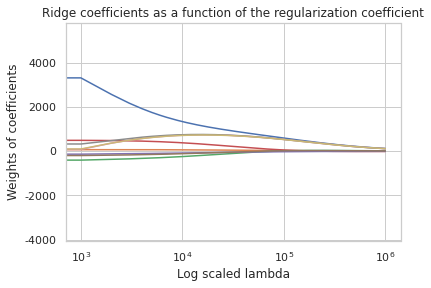

In [89]:
ax = plt.gca()

ax.plot(alpha, coef_ridge_alpha)
  # reverse axis
plt.xlabel("Log scaled lambda")
plt.xscale("log")

plt.ylabel("Weights of coefficients")
plt.title("Ridge coefficients as a function of the regularization coefficient")    #-530 to  400 was the deal.
plt.axis("tight")
plt.show()


<font size="5"> # RIDGE: TABLE</font>

In [90]:
clf_ridge_list = []
rr =  []
rmse_ridge_alpha = []
mae_ridge_alpha = []
r2_score_ridge_alpha = []
n_alphas = 15

alpha1 =  np.linspace(0, 3, 6)
alpha2 = np.linspace(6, 10000000, 9)
alpha = np.concatenate((alpha1, alpha2))


mse_ridge_alpha = []
train_score_ridge_alpha = []
test_score_ridge_alpha = []


In [91]:
for i in range(0,len(alpha)):
    r = Ridge(alpha = alpha[i])
    rr.append(r)
#extra = Ridge(alpha = 1)
#rr.append(extra)
#gonna have to change every len(alpha) to len(alpha)+1---no perhaps there is no need.

In [92]:
rr

[Ridge(alpha=0.0),
 Ridge(alpha=0.6),
 Ridge(alpha=1.2),
 Ridge(alpha=1.7999999999999998),
 Ridge(alpha=2.4),
 Ridge(alpha=3.0),
 Ridge(alpha=6.0),
 Ridge(alpha=1250005.25),
 Ridge(alpha=2500004.5),
 Ridge(alpha=3750003.75),
 Ridge(alpha=5000003.0),
 Ridge(alpha=6250002.25),
 Ridge(alpha=7500001.5),
 Ridge(alpha=8750000.75),
 Ridge(alpha=10000000.0)]

In [93]:
len(rr)

15

In [94]:
for i in range(0,len(alpha)):
    
    clf_ridge = Pipeline(steps=[('scaler2', StandardScaler()),
                      ('ridge_classifier', rr[i])])
    clf_ridge_list.append(clf_ridge)

In [95]:
clf_ridge_list

[Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=0.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=0.6))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=1.2))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=1.7999999999999998))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=2.4))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=3.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=6.0))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=1250005.25))]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('ridge_classifier', Ridge(alpha=2500004.5))]),
 Pipeline

In [96]:
y_pred_ridge_alpha = []
coef_ridge_alpha = []

In [97]:
for i in range(0,len(alpha)):
    
    
    clf_ridge_list[i].fit(x_train, y_train)
    tr_score = clf_ridge_list[i].score(x_train, y_train)
    train_score_ridge_alpha.append(tr_score)
    te_score = clf_ridge_list[i].score(x_test, y_test)
    test_score_ridge_alpha.append(te_score) 
    y_pred_ri = clf_ridge_list[i].predict(x_test)
    y_pred_ridge_alpha.append(y_pred_ri)
    mse_ri = mean_squared_error(y_test, y_pred_ri)
    mse_ridge_alpha.append(mse_ri)
    mae_ri = mean_absolute_error(y_test, y_pred_ri)
    mae_ridge_alpha.append(mae_ri)
    rmse_ri = mean_squared_error(y_test, y_pred_ri)**0.5
    rmse_ridge_alpha.append(rmse_ri)
    r2_ri = r2_score(y_test, y_pred_ri)
    r2_score_ridge_alpha.append(r2_ri)
    coef_ridge = rr[i].coef_
    coef_ridge_alpha.append(coef_ridge)

In [98]:
ridge_table = {'Lambda': alpha, 'RMSE': rmse_ridge_alpha, 'MAE': mae_ridge_alpha, 'R2_score': r2_score_ridge_alpha}

In [99]:
rt = pd.DataFrame(ridge_table)

In [100]:
rt

,Lambda,RMSE,MAE,R2_score
0,0.00,1316.917671,843.972857,0.892502
1,0.60,1316.824099,843.953443,0.892517
2,1.20,1316.741524,843.941125,0.892530
3,1.80,1316.668900,843.935713,0.892542
4,2.40,1316.605299,843.935348,0.892553
5,3.00,1316.549891,843.940272,0.892562
6,6.00,1316.372320,844.019237,0.892591
7,1250005.25,3646.519476,2741.624482,0.175782
8,2500004.50,3818.880100,2892.712607,0.096024
9,3750003.75,3881.727971,2947.831615,0.066026


In [102]:
coef_ridge_alpha

[array([ 5363.1254574 ,    57.25437712,  -463.35746281,   486.90672078,
          218.88211203,  -194.95691068, -1873.31987942,  4000.24506438,
        -3592.5773779 ]),
 array([ 5359.77433271,    57.48811341,  -463.25441772,   486.99069426,
          209.75713537,  -195.24951934, -1874.33735751,  3930.46221686,
        -3518.11493473]),
 array([ 5356.46597069,    57.71591917,  -463.15320869,   487.07311678,
          201.04162455,  -195.53378024, -1874.5615913 ,  3863.14317786,
        -3446.96754267]),
 array([ 5353.19813777,    57.9380466 ,  -463.05372331,   487.15403927,
          192.70887832,  -195.81005922, -1874.06614514,  3798.14804858,
        -3378.91853854]),
 array([ 5349.96877272,    58.15473189,  -462.95585854,   487.2335103 ,
          184.73446186,  -196.07869828, -1872.91746103,  3735.3479677 ,
        -3313.76967222]),
 array([ 5346.77596963,    58.36619665,  -462.85951972,   487.31157622,
          177.09597164,  -196.34001774, -1871.17564169,  3674.62400774,
      

In [103]:
r = pd.DataFrame(coef_ridge_alpha)

In [104]:
r

,0,1,2,3,4,5,6,7,8
0,5363.125457,57.254377,-463.357463,486.906721,218.882112,-194.956911,-1873.319879,4000.245064,-3592.577378
1,5359.774333,57.488113,-463.254418,486.990694,209.757135,-195.249519,-1874.337358,3930.462217,-3518.114935
2,5356.465971,57.715919,-463.153209,487.073117,201.041625,-195.533780,-1874.561591,3863.143178,-3446.967543
3,5353.198138,57.938047,-463.053723,487.154039,192.708878,-195.810059,-1874.066145,3798.148049,-3378.918539
4,5349.968773,58.154732,-462.955859,487.233510,184.734462,-196.078698,-1872.917461,3735.347968,-3313.769672
5,5346.775970,58.366197,-462.859520,487.311576,177.095972,-196.340018,-1871.175642,3674.624008,-3251.339195
6,5331.302795,59.352091,-462.397892,487.682313,143.276412,-197.546732,-1855.308990,3398.565549,-2974.560870
7,105.146635,4.456229,17.833074,-6.122258,-1.170656,13.248548,100.626896,100.852253,100.106453
8,55.672270,2.327535,9.909397,-3.805865,-0.557835,7.294205,53.439041,53.550215,53.167694
9,37.862329,1.575508,6.847572,-2.719443,-0.365058,5.025551,36.379937,36.453672,36.196370


In [105]:
r.columns

RangeIndex(start=0, stop=9, step=1)

In [106]:
r[0]

0     5363.125457
1     5359.774333
2     5356.465971
3     5353.198138
4     5349.968773
5     5346.775970
6     5331.302795
7      105.146635
8       55.672270
9       37.862329
10      28.686133
11      23.090228
12      19.321226
13      16.610009
14      14.566064
Name: 0, dtype: float64

In [107]:
r.columns[0]

0

In [108]:
mapping = {r.columns[0]:'Beta_0', r.columns[1]:'Beta_1', r.columns[2]:'Beta_2', r.columns[3]:'Beta_3', r.columns[4]:'Beta_4', r.columns[5]:'Beta_5', r.columns[6]:'Beta_6', r.columns[7]:'Beta_7', r.columns[8]:'Beta_8'}

In [109]:
r = r.rename(columns=mapping)

In [110]:
r

,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8
0,5363.125457,57.254377,-463.357463,486.906721,218.882112,-194.956911,-1873.319879,4000.245064,-3592.577378
1,5359.774333,57.488113,-463.254418,486.990694,209.757135,-195.249519,-1874.337358,3930.462217,-3518.114935
2,5356.465971,57.715919,-463.153209,487.073117,201.041625,-195.533780,-1874.561591,3863.143178,-3446.967543
3,5353.198138,57.938047,-463.053723,487.154039,192.708878,-195.810059,-1874.066145,3798.148049,-3378.918539
4,5349.968773,58.154732,-462.955859,487.233510,184.734462,-196.078698,-1872.917461,3735.347968,-3313.769672
5,5346.775970,58.366197,-462.859520,487.311576,177.095972,-196.340018,-1871.175642,3674.624008,-3251.339195
6,5331.302795,59.352091,-462.397892,487.682313,143.276412,-197.546732,-1855.308990,3398.565549,-2974.560870
7,105.146635,4.456229,17.833074,-6.122258,-1.170656,13.248548,100.626896,100.852253,100.106453
8,55.672270,2.327535,9.909397,-3.805865,-0.557835,7.294205,53.439041,53.550215,53.167694
9,37.862329,1.575508,6.847572,-2.719443,-0.365058,5.025551,36.379937,36.453672,36.196370


In [111]:
r

,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8
0,5363.125457,57.254377,-463.357463,486.906721,218.882112,-194.956911,-1873.319879,4000.245064,-3592.577378
1,5359.774333,57.488113,-463.254418,486.990694,209.757135,-195.249519,-1874.337358,3930.462217,-3518.114935
2,5356.465971,57.715919,-463.153209,487.073117,201.041625,-195.533780,-1874.561591,3863.143178,-3446.967543
3,5353.198138,57.938047,-463.053723,487.154039,192.708878,-195.810059,-1874.066145,3798.148049,-3378.918539
4,5349.968773,58.154732,-462.955859,487.233510,184.734462,-196.078698,-1872.917461,3735.347968,-3313.769672
5,5346.775970,58.366197,-462.859520,487.311576,177.095972,-196.340018,-1871.175642,3674.624008,-3251.339195
6,5331.302795,59.352091,-462.397892,487.682313,143.276412,-197.546732,-1855.308990,3398.565549,-2974.560870
7,105.146635,4.456229,17.833074,-6.122258,-1.170656,13.248548,100.626896,100.852253,100.106453
8,55.672270,2.327535,9.909397,-3.805865,-0.557835,7.294205,53.439041,53.550215,53.167694
9,37.862329,1.575508,6.847572,-2.719443,-0.365058,5.025551,36.379937,36.453672,36.196370


In [112]:
rid = pd.concat([rt, r], axis=1)

In [113]:
pd.options.display.float_format = '{:,.2g}'.format

In [114]:
rid

,Lambda,RMSE,MAE,R2_score,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8
0,0,1.3e+03,8.4e+02,0.89,5.4e+03,57,-4.6e+02,4.9e+02,2.2e+02,-1.9e+02,-1.9e+03,4e+03,-3.6e+03
1,0.6,1.3e+03,8.4e+02,0.89,5.4e+03,57,-4.6e+02,4.9e+02,2.1e+02,-2e+02,-1.9e+03,3.9e+03,-3.5e+03
2,1.2,1.3e+03,8.4e+02,0.89,5.4e+03,58,-4.6e+02,4.9e+02,2e+02,-2e+02,-1.9e+03,3.9e+03,-3.4e+03
3,1.8,1.3e+03,8.4e+02,0.89,5.4e+03,58,-4.6e+02,4.9e+02,1.9e+02,-2e+02,-1.9e+03,3.8e+03,-3.4e+03
4,2.4,1.3e+03,8.4e+02,0.89,5.3e+03,58,-4.6e+02,4.9e+02,1.8e+02,-2e+02,-1.9e+03,3.7e+03,-3.3e+03
5,3,1.3e+03,8.4e+02,0.89,5.3e+03,58,-4.6e+02,4.9e+02,1.8e+02,-2e+02,-1.9e+03,3.7e+03,-3.3e+03
6,6,1.3e+03,8.4e+02,0.89,5.3e+03,59,-4.6e+02,4.9e+02,1.4e+02,-2e+02,-1.9e+03,3.4e+03,-3e+03
7,1.3e+06,3.6e+03,2.7e+03,0.18,1.1e+02,4.5,18,-6.1,-1.2,13,1e+02,1e+02,1e+02
8,2.5e+06,3.8e+03,2.9e+03,0.096,56,2.3,9.9,-3.8,-0.56,7.3,53,54,53
9,3.8e+06,3.9e+03,2.9e+03,0.066,38,1.6,6.8,-2.7,-0.37,5,36,36,36


In [115]:
rid.to_excel('/home/capella/ridge_t.xlsx')

<font size="5"> # LASSO : Weights vs. Regularization coefficent </font>

In [117]:
clf_lasso_list = []
ll =  []
rmse_lasso_lamda = []
mae_lasso_lamda = []
r2_score_lasso_lamda = []
n_lamdas = 200
lamda = np.linspace(1, 1000, n_lamdas)

mse_lasso_lamda = []
train_score_lasso_lamda = []
test_score_lasso_lamda = []


In [118]:
for i in range(0,len(lamda)):
    l = Lasso(alpha = lamda[i], max_iter = 3000)
    ll.append(l)

In [119]:
ll

[Lasso(max_iter=3000),
 Lasso(alpha=6.0201005025125625, max_iter=3000),
 Lasso(alpha=11.040201005025125, max_iter=3000),
 Lasso(alpha=16.060301507537687, max_iter=3000),
 Lasso(alpha=21.08040201005025, max_iter=3000),
 Lasso(alpha=26.100502512562812, max_iter=3000),
 Lasso(alpha=31.120603015075375, max_iter=3000),
 Lasso(alpha=36.14070351758794, max_iter=3000),
 Lasso(alpha=41.1608040201005, max_iter=3000),
 Lasso(alpha=46.18090452261306, max_iter=3000),
 Lasso(alpha=51.201005025125625, max_iter=3000),
 Lasso(alpha=56.22110552763819, max_iter=3000),
 Lasso(alpha=61.24120603015075, max_iter=3000),
 Lasso(alpha=66.26130653266331, max_iter=3000),
 Lasso(alpha=71.28140703517587, max_iter=3000),
 Lasso(alpha=76.30150753768844, max_iter=3000),
 Lasso(alpha=81.321608040201, max_iter=3000),
 Lasso(alpha=86.34170854271356, max_iter=3000),
 Lasso(alpha=91.36180904522612, max_iter=3000),
 Lasso(alpha=96.38190954773869, max_iter=3000),
 Lasso(alpha=101.40201005025125, max_iter=3000),
 Lasso(alpha=

In [120]:
for i in range(0,len(lamda)):
    
    clf_lasso = Pipeline(steps=[('scaler3', StandardScaler()),
                      ('lasso_classifier', ll[i])])
    clf_lasso_list.append(clf_lasso)

In [121]:
clf_lasso_list

[Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier',
                  Lasso(alpha=6.0201005025125625, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier',
                  Lasso(alpha=11.040201005025125, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier',
                  Lasso(alpha=16.060301507537687, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier',
                  Lasso(alpha=21.08040201005025, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier',
                  Lasso(alpha=26.100502512562812, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier',
                  Lasso(alpha

In [122]:
y_pred_lasso_lamda = []
coef_lasso_lamda = []

In [123]:
for i in range(0,len(lamda)):
    
    
    clf_lasso_list[i].fit(x_train, y_train)
    tr_score_las = clf_lasso_list[i].score(x_train, y_train)
    train_score_lasso_lamda.append(tr_score_las)
    te_score_las = clf_lasso_list[i].score(x_test, y_test)
    test_score_lasso_lamda.append(te_score_las) 
    y_pred_las = clf_lasso_list[i].predict(x_test)
    y_pred_lasso_lamda.append(y_pred_las)
    mse_las = mean_squared_error(y_test, y_pred_las)
    mse_lasso_lamda.append(mse_las)
    mae_las = mean_absolute_error(y_test, y_pred_las)
    mae_lasso_lamda.append(mae_las)
    rmse_las = mean_squared_error(y_test, y_pred_las)**0.5
    rmse_lasso_lamda.append(rmse_las)
    r2_las = r2_score(y_test, y_pred_las)
    r2_score_lasso_lamda.append(r2_las)
    coef_las = ll[i].coef_
    coef_lasso_lamda.append(coef_las)

In [124]:
train_score_lasso_lamda

[0.8848865024917837,
 0.8832837766932864,
 0.8827040947229321,
 0.8817659729763891,
 0.8805702403692767,
 0.8790562821077024,
 0.8778063903469859,
 0.8776238666333629,
 0.8774140845197382,
 0.8771770485541175,
 0.8769127543648417,
 0.876621201951911,
 0.8763023913153251,
 0.875956322455084,
 0.875582995371188,
 0.8751824100636368,
 0.8747585234923612,
 0.8743505018294621,
 0.8739181344829361,
 0.8734613303148432,
 0.8729800885677385,
 0.8724744105117391,
 0.8719441940477655,
 0.8713893181819551,
 0.8709045722978107,
 0.8704428237868164,
 0.8699929420449425,
 0.8696100424488311,
 0.8692119474541571,
 0.8688003467691252,
 0.8683744067025518,
 0.8679341272544369,
 0.8674795084247803,
 0.8670105502135822,
 0.8665272526208425,
 0.8660296156465613,
 0.8655176426941908,
 0.8649913331503059,
 0.8644506845527289,
 0.86389569690146,
 0.8633263701964992,
 0.8627426926715661,
 0.8621446505779022,
 0.8615322676774753,
 0.8609055439702853,
 0.8602644794563323,
 0.8596090741356163,
 0.858939328008137

In [125]:
len(train_score_lasso_lamda)

200

In [126]:
test_score_lasso_lamda

[0.8925805448983095,
 0.8914313165569944,
 0.8909086178631207,
 0.8900216843671481,
 0.8888251440984851,
 0.8872877351969519,
 0.886024240613642,
 0.8858611033824173,
 0.8856709963394431,
 0.8854539250913392,
 0.8852098838746177,
 0.8849388726892786,
 0.8846408915353218,
 0.8843159404127472,
 0.8839640193215551,
 0.8835851282617453,
 0.8831833210051294,
 0.8827993707489623,
 0.8823916212884235,
 0.8819599806257002,
 0.881504448012639,
 0.8810250247000373,
 0.8805216107951708,
 0.8799940889963771,
 0.8795398052278977,
 0.8791100123301501,
 0.8786885320245699,
 0.8783236680990475,
 0.8779436911996351,
 0.8775503319603066,
 0.877142736292813,
 0.8767209041971543,
 0.8762848356733306,
 0.8758345307213418,
 0.8753699893411878,
 0.8748912115328689,
 0.8743982007868892,
 0.8738909564706252,
 0.8733694760579719,
 0.8728337595489292,
 0.872283806943497,
 0.8717196062691807,
 0.8711411435439882,
 0.8705484429502658,
 0.8699415044880134,
 0.8693203281572311,
 0.8686849139579189,
 0.86803526189007

In [127]:
mse_lasso_lamda

[1732998.345035722,
 1751538.8488176656,
 1759971.5481883518,
 1774280.448556745,
 1793584.235784102,
 1818387.2575409887,
 1838771.218898499,
 1841403.1122688248,
 1844470.10968137,
 1847972.1206845236,
 1851909.2382606505,
 1856281.4624097524,
 1861088.7931318278,
 1866331.2304268787,
 1872008.7742949033,
 1878121.424735903,
 1884603.782238829,
 1890798.0527076537,
 1897376.2758017292,
 1904339.9357220046,
 1911689.044538442,
 1919423.5820719274,
 1927545.1598920324,
 1936055.6704267794,
 1943384.631630373,
 1950318.48155355,
 1957118.2244059427,
 1963004.5750534574,
 1969134.7433475542,
 1975480.808965886,
 1982056.5509163684,
 1988861.9691990009,
 1995897.0638137832,
 2003161.8347607148,
 2010656.2820397962,
 2018380.4056510278,
 2026334.1492820927,
 2034517.5231391108,
 2042930.5679757402,
 2051573.283791981,
 2060445.670587834,
 2069547.9215155889,
 2078880.2621467568,
 2088442.3023474852,
 2098234.0421177726,
 2108255.4814576195,
 2118506.6203670274,
 2128987.4588459944,
 213969

In [128]:
mae_lasso_lamda

[843.5882628759778,
 851.3555931121869,
 859.9061658156032,
 870.9545299783363,
 884.133391434055,
 899.8434974343377,
 911.0182568149272,
 909.5565399450084,
 908.2080715848282,
 906.9727923302853,
 905.8277963477514,
 904.804663613961,
 903.9103693459914,
 903.1663442717885,
 902.5635673235512,
 902.1005975899554,
 901.7507760503063,
 901.2975142596865,
 900.9400190774775,
 900.6847477294298,
 900.5343961393252,
 900.4874480480893,
 900.5388839250111,
 900.6949234424109,
 900.6605229376421,
 900.5803838901182,
 900.4589555960058,
 900.076226397524,
 899.7672391935231,
 899.552180228426,
 899.4198511881947,
 899.3596217478174,
 899.3539127328485,
 899.4117540506633,
 899.5350976980293,
 899.7164329725156,
 899.9584776774909,
 900.276673715472,
 900.6600381402,
 901.1204977560794,
 901.6580873933046,
 902.2665078048852,
 902.9265669784075,
 903.6496454452308,
 904.4549608149509,
 905.3310807980099,
 906.3019103099253,
 907.3352125148397,
 908.459309995154,
 909.6693298819282,
 910.9848

In [129]:
r2_score_lasso_lamda

[0.8925805448983095,
 0.8914313165569944,
 0.8909086178631207,
 0.8900216843671481,
 0.8888251440984851,
 0.8872877351969519,
 0.886024240613642,
 0.8858611033824173,
 0.8856709963394431,
 0.8854539250913392,
 0.8852098838746177,
 0.8849388726892786,
 0.8846408915353218,
 0.8843159404127472,
 0.8839640193215551,
 0.8835851282617453,
 0.8831833210051294,
 0.8827993707489623,
 0.8823916212884235,
 0.8819599806257002,
 0.881504448012639,
 0.8810250247000373,
 0.8805216107951708,
 0.8799940889963771,
 0.8795398052278977,
 0.8791100123301501,
 0.8786885320245699,
 0.8783236680990475,
 0.8779436911996351,
 0.8775503319603066,
 0.877142736292813,
 0.8767209041971543,
 0.8762848356733306,
 0.8758345307213418,
 0.8753699893411878,
 0.8748912115328689,
 0.8743982007868892,
 0.8738909564706252,
 0.8733694760579719,
 0.8728337595489292,
 0.872283806943497,
 0.8717196062691807,
 0.8711411435439882,
 0.8705484429502658,
 0.8699415044880134,
 0.8693203281572311,
 0.8686849139579189,
 0.86803526189007

In [130]:
rmse_lasso_lamda

[1316.4339501227253,
 1323.4571579079036,
 1326.6391929188403,
 1332.0211892296402,
 1339.247637960994,
 1348.475901727943,
 1356.0129862573215,
 1356.9830921086766,
 1358.1127013916666,
 1359.4013832141425,
 1360.8487198291552,
 1362.4542056193127,
 1364.2172822288346,
 1366.1373395185708,
 1368.2137166009202,
 1370.4457029506507,
 1372.8087201933229,
 1375.062926817407,
 1377.452821624657,
 1379.9782374088386,
 1382.6384359399394,
 1385.43263353796,
 1388.3606015340656,
 1391.4221754833359,
 1394.053310182352,
 1396.5380344099297,
 1398.970415843717,
 1401.072651597146,
 1403.258615989068,
 1405.5179859987156,
 1407.8553018390662,
 1410.2701759588483,
 1412.7622106404826,
 1415.330998304183,
 1417.976121815807,
 1420.697154797963,
 1423.4936421642678,
 1426.3651436918635,
 1429.3112215244587,
 1432.3314154873449,
 1435.425257750411,
 1438.5923402811475,
 1441.832258671846,
 1445.144388062136,
 1448.528233110343,
 1451.9832924168306,
 1455.5090588405924,
 1459.1050198138564,
 1462.770

In [133]:
coef_lasso_lamda

[array([ 5305.73233728,    61.18561401,  -460.68622103,   487.88161197,
           66.47801412,  -200.8346573 , -1674.03730004,  2635.11315099,
        -2364.17618552]),
 array([5048.46432318,   67.8595536 , -449.61326691,  489.73335083,
        -188.64667569, -205.61143952, -974.70916768,    0.        ,
        -165.36425193]),
 array([4796.63854461,   64.63418023, -439.37568221,  489.17749428,
        -146.0152033 , -197.79879266, -538.43011735,   -0.        ,
        -355.3525939 ]),
 array([4544.80754321,   61.4082724 , -429.13795099,  488.621517  ,
        -103.40631689, -189.98542206, -102.33424522,   -0.        ,
        -545.15210901]),
 array([4299.49243699,   57.18642158, -418.84478254,  487.54079843,
        -100.80054435, -180.90365128,   -0.        ,   -0.        ,
        -406.68233081]),
 array([4051.69386455,   52.67494769, -408.47765313,  486.3860767 ,
        -110.83807501, -171.41768959,   -0.        ,   -0.        ,
        -163.14381877]),
 array([3882.68824974,   

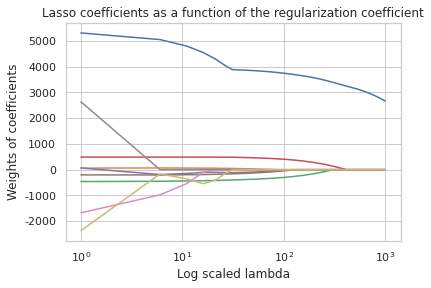

In [135]:
ax = plt.gca()

ax.plot(lamda, coef_lasso_lamda)
  # reverse axis
plt.xlabel("Log scaled lambda")
plt.xscale("log")

plt.ylabel("Weights of coefficients")
plt.title("Lasso coefficients as a function of the regularization coefficient")    #-530 to  400 was the deal.
#plt.axis("tight")
plt.show()


<font size="5"> # LASSO Table </font>

In [171]:
clf_lasso_list = []
ll =  []
rmse_lasso_lamda = []
mae_lasso_lamda = []
r2_score_lasso_lamda = []
n_lamdas = 15
lamda1 = np.linspace(1, 10, 6 )
lamda2 = np.linspace(11, 500, 9)
lamda = np.concatenate((lamda1, lamda2))

mse_lasso_lamda = []
train_score_lasso_lamda = []
test_score_lasso_lamda = []


In [172]:
for i in range(0,len(lamda)):
    l = Lasso(alpha = lamda[i],  max_iter = 3000)
    ll.append(l)

In [174]:
ll

[Lasso(max_iter=3000),
 Lasso(alpha=2.8, max_iter=3000),
 Lasso(alpha=4.6, max_iter=3000),
 Lasso(alpha=6.4, max_iter=3000),
 Lasso(alpha=8.2, max_iter=3000),
 Lasso(alpha=10.0, max_iter=3000),
 Lasso(alpha=11.0, max_iter=3000),
 Lasso(alpha=72.125, max_iter=3000),
 Lasso(alpha=133.25, max_iter=3000),
 Lasso(alpha=194.375, max_iter=3000),
 Lasso(alpha=255.5, max_iter=3000),
 Lasso(alpha=316.625, max_iter=3000),
 Lasso(alpha=377.75, max_iter=3000),
 Lasso(alpha=438.875, max_iter=3000),
 Lasso(alpha=500.0, max_iter=3000)]

In [175]:
for i in range(0,len(lamda)):
    
    clf_lasso = Pipeline(steps=[('scaler3', StandardScaler()),
                      ('lasso_classifier', ll[i])])
    clf_lasso_list.append(clf_lasso)

In [176]:
clf_lasso_list

[Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(alpha=2.8, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(alpha=4.6, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(alpha=6.4, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(alpha=8.2, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(alpha=10.0, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(alpha=11.0, max_iter=3000))]),
 Pipeline(steps=[('scaler3', StandardScaler()),
                 ('lasso_classifier', Lasso(alpha=72.125, max_iter=3000))]),
 Pipeline(steps=[('scaler3', S

In [177]:
y_pred_lasso_lamda = []
coef_lasso_lamda = []

In [178]:
for i in range(0,len(lamda)):
    
    
    clf_lasso_list[i].fit(x_train, y_train)
    tr_score_las = clf_lasso_list[i].score(x_train, y_train)
    train_score_lasso_lamda.append(tr_score_las)
    te_score_las = clf_lasso_list[i].score(x_test, y_test)
    test_score_lasso_lamda.append(te_score_las) 
    y_pred_las = clf_lasso_list[i].predict(x_test)
    y_pred_lasso_lamda.append(y_pred_las)
    mse_las = mean_squared_error(y_test, y_pred_las)
    mse_lasso_lamda.append(mse_las)
    mae_las = mean_absolute_error(y_test, y_pred_las)
    mae_lasso_lamda.append(mae_las)
    rmse_las = mean_squared_error(y_test, y_pred_las)**0.5
    rmse_lasso_lamda.append(rmse_las)
    r2_las = r2_score(y_test, y_pred_las)
    r2_score_lasso_lamda.append(r2_las)
    coef_las = ll[i].coef_
    coef_lasso_lamda.append(coef_las)

In [179]:
lasso_table = {'Lambda': lamda, 'RMSE': rmse_lasso_lamda, 'MAE': mae_lasso_lamda, 'R2_score': r2_score_lasso_lamda}

In [180]:
lt = pd.DataFrame(lasso_table)

In [181]:
lo = pd.DataFrame(coef_lasso_lamda)

In [182]:
mapping = {lo.columns[0]:'Beta_0', lo.columns[1]:'Beta_1', lo.columns[2]:'Beta_2', lo.columns[3]:'Beta_3', lo.columns[4]:'Beta_4', lo.columns[5]:'Beta_5', lo.columns[6]:'Beta_6', lo.columns[7]:'Beta_7', lo.columns[8]:'Beta_8'}

In [183]:
lo = lo.rename(columns=mapping)

In [184]:
las = pd.concat([lt, lo], axis=1)

In [185]:
las

,Lambda,RMSE,MAE,R2_score,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8
0,1,1.3e+03,8.4e+02,0.89,5.3e+03,61,-4.6e+02,4.9e+02,66,-2e+02,-1.7e+03,2.6e+03,-2.4e+03
1,2.8,1.3e+03,8.5e+02,0.89,5.2e+03,69,-4.6e+02,4.9e+02,-1.3e+02,-2.1e+02,-1e+03,4.9e+02,-7.5e+02
2,4.6,1.3e+03,8.5e+02,0.89,5.1e+03,69,-4.5e+02,4.9e+02,-2e+02,-2.1e+02,-1.1e+03,0,-1.1e+02
3,6.4,1.3e+03,8.5e+02,0.89,5e+03,68,-4.5e+02,4.9e+02,-1.9e+02,-2.1e+02,-9.4e+02,0,-1.8e+02
4,8.2,1.3e+03,8.5e+02,0.89,4.9e+03,66,-4.5e+02,4.9e+02,-1.7e+02,-2e+02,-7.9e+02,-0,-2.5e+02
5,10,1.3e+03,8.6e+02,0.89,4.8e+03,65,-4.4e+02,4.9e+02,-1.5e+02,-2e+02,-6.3e+02,-0,-3.2e+02
6,11,1.3e+03,8.6e+02,0.89,4.8e+03,65,-4.4e+02,4.9e+02,-1.5e+02,-2e+02,-5.4e+02,-0,-3.5e+02
7,72,1.4e+03,9e+02,0.88,3.8e+03,8.5,-3.4e+02,4.4e+02,-64,-91,0,0,0
8,1.3e+02,1.4e+03,9e+02,0.88,3.7e+03,0,-2.5e+02,3.7e+02,-0,-0,0,0,0
9,1.9e+02,1.4e+03,9e+02,0.87,3.6e+03,0,-1.6e+02,2.8e+02,-0,-0,0,0,0


In [186]:
las.to_excel('/home/capella/lasso_t.xlsx')

<font size="5"> # LASSO: CROSS VALIDATION </font>

In [187]:
clf_lasso_list = []
ll =  []
rmse_lasso_lamda = []
mae_lasso_lamda = []
r2_score_lasso_lamda = []
n_lamdas = 200
lamda = np.linspace(1, 200, n_lamdas)

mse_lasso_lamda = []
train_score_lasso_lamda = []
test_score_lasso_lamda = []


In [188]:
for i in range(0,len(lamda)):
    l = Lasso(alpha = lamda[i], max_iter = 3000)
    ll.append(l)

In [189]:
ll

[Lasso(max_iter=3000),
 Lasso(alpha=2.0, max_iter=3000),
 Lasso(alpha=3.0, max_iter=3000),
 Lasso(alpha=4.0, max_iter=3000),
 Lasso(alpha=5.0, max_iter=3000),
 Lasso(alpha=6.0, max_iter=3000),
 Lasso(alpha=7.0, max_iter=3000),
 Lasso(alpha=8.0, max_iter=3000),
 Lasso(alpha=9.0, max_iter=3000),
 Lasso(alpha=10.0, max_iter=3000),
 Lasso(alpha=11.0, max_iter=3000),
 Lasso(alpha=12.0, max_iter=3000),
 Lasso(alpha=13.0, max_iter=3000),
 Lasso(alpha=14.0, max_iter=3000),
 Lasso(alpha=15.0, max_iter=3000),
 Lasso(alpha=16.0, max_iter=3000),
 Lasso(alpha=17.0, max_iter=3000),
 Lasso(alpha=18.0, max_iter=3000),
 Lasso(alpha=19.0, max_iter=3000),
 Lasso(alpha=20.0, max_iter=3000),
 Lasso(alpha=21.0, max_iter=3000),
 Lasso(alpha=22.0, max_iter=3000),
 Lasso(alpha=23.0, max_iter=3000),
 Lasso(alpha=24.0, max_iter=3000),
 Lasso(alpha=25.0, max_iter=3000),
 Lasso(alpha=26.0, max_iter=3000),
 Lasso(alpha=27.0, max_iter=3000),
 Lasso(alpha=28.0, max_iter=3000),
 Lasso(alpha=29.0, max_iter=3000),
 Lass

In [190]:
for i in range(0,len(lamda)):
    
    clf_lasso = Pipeline(steps=[('scaler3', StandardScaler()),
                      ('lasso_classifier', ll[i])])
    clf_lasso_list.append(clf_lasso)

In [191]:
scores = []
stds = []


In [192]:
for i in range(0, len(lamda)):
    score = cross_validate(clf_lasso_list[i], x_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error' ),
                            return_train_score=True)
    d = score['test_neg_mean_squared_error']
    d = abs(d)
    m = d.mean()
    st = np.std(d)
    scores.append(m)
    stds.append(st)
    

In [193]:
stds

[94691.52917665776,
 95802.28477321683,
 97098.79740541212,
 95437.27103519825,
 94621.58523134595,
 93817.38975506392,
 93024.46386744779,
 92265.69808714783,
 91469.9296838378,
 90689.09992656435,
 89927.32595548207,
 89182.3128831151,
 88452.87841362951,
 87739.63398619904,
 87055.82581254984,
 86454.0730800077,
 85908.79292981846,
 85367.8531720701,
 84844.61247875789,
 84353.4294752356,
 83853.32573658637,
 83362.9233379401,
 82880.99584500717,
 82396.5733735008,
 81886.05798294282,
 81357.32299639766,
 80875.58928349176,
 80650.83911365022,
 80640.50427437024,
 81617.91739996478,
 81942.51812110907,
 81856.21785457908,
 81769.87446748836,
 81683.48871799721,
 81597.06137387015,
 81511.29693002782,
 81424.7779555808,
 81338.21305902011,
 81251.60890770343,
 81164.96655311345,
 81078.28683324633,
 80991.57222966675,
 80904.82481555546,
 80818.04286051213,
 80731.22724472391,
 80644.3788586452,
 80557.4986030599,
 80470.58738913886,
 80383.64734176673,
 80296.67934046773,
 80209.683

In [194]:
for i in range(0,len(lamda)):
    stds[i] = float(stds[i]/(math.sqrt(5)))
    

In [200]:
min(scores)
for i in range(0, len(lamda)):
    if scores[i] == min(scores):
        print(i)
        break


0


In [201]:
g = pd.DataFrame({'mse_cross':scores, 'stds_cross': stds})

In [202]:
g

,mse_cross,stds_cross
0,1.8e+06,4.2e+04
1,1.8e+06,4.3e+04
2,1.8e+06,4.3e+04
3,1.8e+06,4.3e+04
4,1.8e+06,4.2e+04
...,...,...
195,2.2e+06,3.1e+04
196,2.2e+06,3.1e+04
197,2.2e+06,3.1e+04
198,2.2e+06,3.1e+04


In [203]:
error = stds

In [204]:
h = []
j = []
for i in range(0, len(lamda)):
    if scores[i] >= min(scores)- float(stds[2]/2) and scores[i] <= min(scores)+ float(stds[2]/2):
        h.append(scores[i])
        j.append(i)
        print(i)
    

0
1
2


In [205]:
lamda[max(j)]

3.0

In [207]:
lamda[0]

1.0

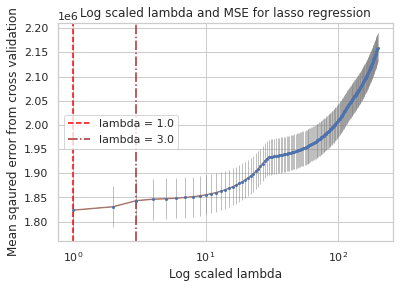

In [208]:
ax = plt.gca()
plt.xscale("log")
ax.errorbar(x = lamda, y = scores, yerr=error, ecolor = 'grey', marker='o', markersize = 2, linewidth = 0.5)

ax.plot(lamda, scores)
plt.axvline(x = lamda[0],ls = '--', label = 'lambda = 1.0', color = 'red')
plt.axvline(x = lamda[2],ls = '-.', label = 'lambda = 3.0', color = 'brown')
plt.legend(loc='center left')
#ax.plot(k,scores, ls = '--', color = 'red')
#ax.plot(an,scores, ls ='--', color = 'brown')
  # reverse axi
#plt.annotate('Lamda = 89.45', xy = (10^2, 2.2),fontsize = 16, xytext = (4*10^2, 2.2), arrowprops = dict(facecolor = 'red'),color = 'g')
plt.xlabel("Log scaled lambda")


plt.ylabel("Mean sqaured error from cross validation")
plt.title("Log scaled lambda and MSE for lasso regression")    #-530 to  400 was the deal.
#plt.axis("tight")
plt.show()